In [70]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt       
import tensorflow_datasets as tfds

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences

## import data

In [72]:
train_df = pd.read_csv('/content/drive/MyDrive/AI/dataset/US_PPPM/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/AI/dataset/US_PPPM/test.csv')

In [73]:
title_df = pd.read_csv('/content/drive/MyDrive/AI/dataset/US_PPPM/titles.csv')

## Preprocessing

In [74]:
###공개 데이터 셋을 활용하여 title의 code와 context의 내용을 merge 함
cpc_codes = title_df.rename(columns = {"code" : "context"})
train_df = pd.merge(train_df, cpc_codes[["context","title"]], on ="context", how = "left")
test_df = pd.merge(test_df, cpc_codes[["context","title"]], on ="context", how = "left")
train_df.head(2020)

,id,anchor,target,context,score,title
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50,FURNITURE; DOMESTIC ARTICLES OR APPLIANCES; CO...
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75,FURNITURE; DOMESTIC ARTICLES OR APPLIANCES; CO...
2,36d72442aefd8232,abatement,active catalyst,A47,0.25,FURNITURE; DOMESTIC ARTICLES OR APPLIANCES; CO...
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50,FURNITURE; DOMESTIC ARTICLES OR APPLIANCES; CO...
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,FURNITURE; DOMESTIC ARTICLES OR APPLIANCES; CO...
...,...,...,...,...,...,...
2015,896c5ed804f0aa75,arc type,wavelength,G01,0.25,MEASURING; TESTING
2016,6b6f4930846143cc,arc type,wavelength type,G01,0.50,MEASURING; TESTING
2017,7208790b14bca9e5,arc type,welding cycle,G01,0.25,MEASURING; TESTING
2018,6ee7239b0680f6da,arc type,welding waveform,G01,0.25,MEASURING; TESTING


In [75]:
test_df

,id,anchor,target,context,title
0,4112d61851461f60,opc drum,inorganic photoconductor drum,G02,OPTICS
1,09e418c93a776564,adjust gas flow,altering gas flow,F23,COMBUSTION APPARATUS; COMBUSTION PROCESSES
2,36baf228038e314b,lower trunnion,lower locating,B60,VEHICLES IN GENERAL
3,1f37ead645e7f0c8,cap component,upper portion,D06,TREATMENT OF TEXTILES OR THE LIKE; LAUNDERING;...
4,71a5b6ad068d531f,neural stimulation,artificial neural network,H04,ELECTRIC COMMUNICATION TECHNIQUE
5,474c874d0c07bd21,dry corn,dry corn starch,C12,BIOCHEMISTRY; BEER; SPIRITS; WINE; VINEGAR; MI...
6,442c114ed5c4e3c9,tunneling capacitor,capacitor housing,G11,INFORMATION STORAGE
7,b8ae62ea5e1d8bdb,angular contact bearing,contact therapy radiation,B23,MACHINE TOOLS; METAL-WORKING NOT OTHERWISE PRO...
8,faaddaf8fcba8a3f,produce liquid hydrocarbons,produce a treated stream,C10,"PETROLEUM, GAS OR COKE INDUSTRIES; TECHNICAL G..."
9,ae0262c02566d2ce,diesel fuel tank,diesel fuel tanks,F02,COMBUSTION ENGINES; HOT-GAS OR COMBUSTION-PROD...


In [76]:
train_df = train_df.drop(['id'],axis =1)
test_df = test_df.drop(['id'],axis =1)

#### 레이블 인코더

In [77]:
encoder = LabelEncoder()

def preprocessing_labelEncoder(df_col) :
    encoder.fit(df_col)
    labels = encoder.transform(df_col)
    return labels

In [78]:
train_df['anchor'] = preprocessing_labelEncoder(train_df['anchor'])
train_df['context'] = preprocessing_labelEncoder(train_df['context'])
train_df['title'] = preprocessing_labelEncoder(train_df['title'])

test_df['anchor'] = preprocessing_labelEncoder(test_df['anchor'])
test_df['context'] = preprocessing_labelEncoder(test_df['context'])
test_df['title'] = preprocessing_labelEncoder(test_df['title'])

In [79]:
train_df

,anchor,target,context,score,title
0,0,abatement of pollution,10,0.50,39
1,0,act of abating,10,0.75,39
2,0,active catalyst,10,0.25,39
3,0,eliminating process,10,0.50,39
4,0,forest region,10,0.00,39
...,...,...,...,...,...
36468,732,wooden article,31,1.00,24
36469,732,wooden box,31,0.50,24
36470,732,wooden handle,31,0.50,24
36471,732,wooden material,31,0.75,24


#### 카테고리 컬럼 array 화

In [80]:
tr_anchor = np.array(train_df['anchor'])
tr_context = np.array(train_df['context'])
tr_title = np.array(train_df['title'])

In [81]:
def cat_array(df) :
    tr_anchor = np.array(df['anchor'])
    tr_context = np.array(df['context'])
    tr_title = np.array(df['title'])

    arr= []
    for i in range(len(df)) :
        arr.append([tr_anchor[i],tr_context[i],tr_title[i]])

    arr = np.array(arr)
    print('array 형상 : ', arr.shape)
    return arr

def int_encodding(columns) :
  text = []
  for i in range(len(columns)) :
      a = tokenizer.encode(columns[i])
      text.append(a)
  return text

def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

def concat_col(text_data, cat_data) :
  train_X = []
  for i in range(len(cat_data)) : 
      a = np.concatenate((text_data[i],cat_data[i]),axis=0)
      train_X.append(a)
  train_X = np.array(train_X)
  return train_X 

In [82]:
train_X = cat_array(train_df)
test_X = cat_array(test_df)
print('형상 예시 : {}'.format(X_test[:5]))

array 형상 :  (36473, 3)
array 형상 :  (36, 3)
형상 예시 : [[22 22 19]
 [ 0 20  5]
 [18  7 28]
 [ 4 14 27]
 [20 27  8]]


## 정수인코딩

In [83]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    train_df['target'], target_vocab_size=2**13)

In [84]:
print(tokenizer.subwords[:100])

['of_', 'system', 'device', 'in_', 'control_', 'layer', 'signal', 'unit', 'water_', 'member', 'material', 'the_', 'ing_', 'to_', 'apparatus', 'power_', 'flow_', 'ing', 'metal_', 'assembly', 'a_', 'liquid_', 'circuit', 'data_', 'surface', 'non_', 'means', 'data', 'with_', 'outer_', 'machine', 'mechanism', 'optical_', 'fluid_', 'acid', 'inner_', 'control', 'element', 'pressure_', 'position', 'flexible_', 'substrate', 'light_', 'information', 'air_', 'source', 'composition', 'display', 'by_', 'storage_', 'ed_', 'portion', 'coating', 'blood_', 'method', 'from_', 'for_', 'electrical_', 'electric_', 'surface_', 'gas_', 'd_', 'component', 'compound', 'structure', 'on_', 'members', 'support_', 'process', 'source_', 'image', 'transmission', 'group', 'valve', 'supply_', 'path', 'based_', 'form_', 's_', 'chemical_', 'average_', 'acid_', 'image_', 'e_', 'display_', 'type_', 'predetermined_', 'high_', 'voltage_', 'value', 'speed_', 'sheet_', 'drive_', 'area', 'light', 'channel', 'linear_', 'communi

In [85]:
print(train_df['target'][20])

water bodies


In [86]:
#%%
## 정수 인코딩 결과
print('Tokenized sample question: {}'.format(tokenizer.encode(train_df['target'][2000])))

Tokenized sample question: [3452, 7398, 52]


In [87]:
text_train = int_encodding(train_df['target'])
text_test = int_encodding(test_df['target'])

## 패딩

In [88]:
print('단어 집합의 크기(Vocab size) :', tokenizer.vocab_size)

단어 집합의 크기(Vocab size) : 7622


리뷰의 최대 길이 : 42
리뷰의 평균 길이 : 2.4617936555808404


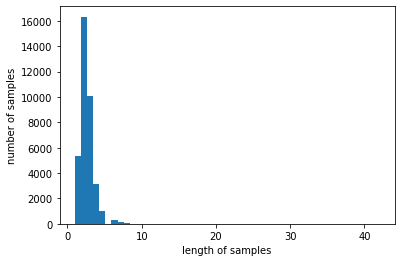

In [89]:
print('리뷰의 최대 길이 :',max(len(review) for review in text_train))
print('리뷰의 평균 길이 :',sum(map(len, text_train))/len(text_train))
plt.hist([len(review) for review in text_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [90]:
max_len = 5
below_threshold_len(max_len, text_train)

전체 샘플 중 길이가 5 이하인 샘플의 비율: 98.51396923751817


In [91]:
text_train = pad_sequences(text_train, maxlen=max_len, padding='post')
text_test = pad_sequences(text_test, maxlen=max_len, padding='post')

In [92]:
X_train = concat_col(text_train, train_X)
X_test = concat_col(text_test, test_X)

In [94]:
import pickle

# save
with open('/content/drive/MyDrive/AI/Project/US_PPPM/X_train.pickle', 'wb') as f:
    pickle.dump(X_train, f, pickle.HIGHEST_PROTOCOL)

# save
with open('/content/drive/MyDrive/AI/Project/US_PPPM/X_test.pickle', 'wb') as f:
    pickle.dump(X_test, f, pickle.HIGHEST_PROTOCOL)